In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Fare'].mean()

32.2042079685746

In [6]:
df[df['Survived']==0]['Age'].mean()

30.62617924528302

In [7]:
df[(df['Survived']==0) & (df['Sex']=='female')]['Age'].min()

2.0

In [8]:
df.loc[0:8, 'PassengerId':'Name']

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
5,6,0,3,"Moran, Mr. James"
6,7,0,1,"McCarthy, Mr. Timothy J"
7,8,0,3,"Palsson, Master. Gosta Leonard"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


In [9]:
df.iloc[0:8, 0:4]

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
5,6,0,3,"Moran, Mr. James"
6,7,0,1,"McCarthy, Mr. Timothy J"
7,8,0,3,"Palsson, Master. Gosta Leonard"


In [10]:
df[-1:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [36]:
columns_to_show=['Fare','Age']
df.groupby(['Sex'])[columns_to_show].describe(percentiles=[])

Fare                                                Age             \
        count       mean        std   min   50%       max  count       mean   
Sex                                                                           
female  314.0  44.479818  57.997698  6.75  23.0  512.3292  261.0  27.915709   
male    577.0  25.523893  43.138263  0.00  10.5  512.3292  453.0  30.726645   

                                     
              std   min   50%   max  
Sex                                  
female  14.110146  0.75  27.0  63.0  
male    14.678201  0.42  29.0  80.0

In [12]:
columns_to_show=['Fare','Age']
df.groupby(['Sex'])[columns_to_show].agg([np.max, np.min, np.mean])

Fare                    Age                 
            amax  amin       mean  amax  amin       mean
Sex                                                     
female  512.3292  6.75  44.479818  63.0  0.75  27.915709
male    512.3292  0.00  25.523893  80.0  0.42  30.726645

In [13]:
pd.crosstab(df['Sex'], df['Parch'])

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,194,60,49,4,2,4,1
male,484,58,31,1,2,1,0


In [14]:
pd.pivot_table(
    df,
    values=['Fare','Age'],
    index=['Pclass'],
    aggfunc='mean'
)

,Age,Fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


In [15]:
ff=df['Fare']*80/100
df.insert(loc=len(df.columns), column='Sale20%', value=ff)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sale20%
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,5.80000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,57.02664
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,6.34000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,42.48000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6.44000


In [16]:
df['Sale15%']=df['Fare']*85/100
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sale20%,Sale15%
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,5.80000,6.162500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,57.02664,60.590805
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,6.34000,6.736250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,42.48000,45.135000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6.44000,6.842500


In [17]:
df=df.drop(['Sale20%','Sale15%'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
pd.crosstab(df['Survived'],df['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [19]:
df.shape

(891, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [21]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5,1,'Распределение выживших')

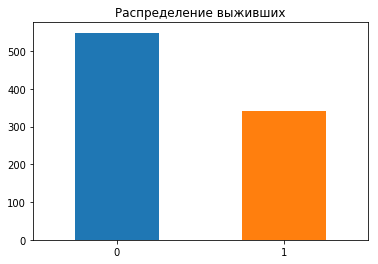

In [31]:
df['Survived'].value_counts().plot(kind='bar', rot=0)
plt.title('Распределение выживших')


### Рис.1 - Распределение выживших
На рисунке мы видим, что:
1. Количество погибших равно более 500 человек (значение 0).
2. Количество выживших равно приблизительно 36 человек (значение 1).
3. Количество погибших превышает количество выживших.

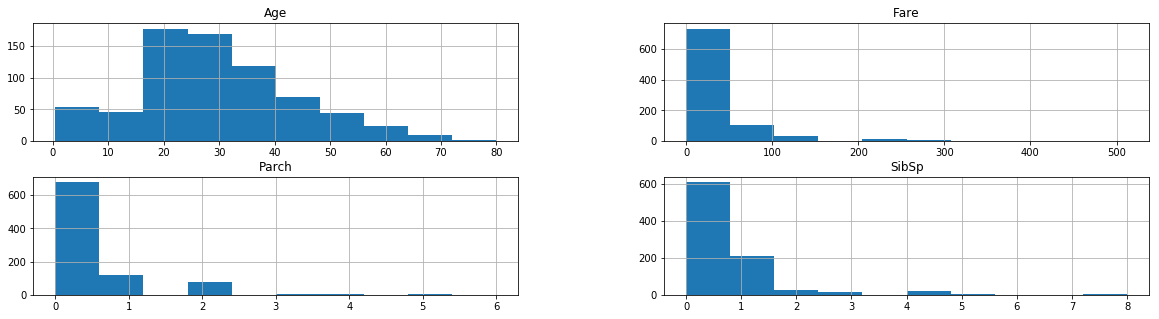

In [23]:
features = list(set(df.columns)- set(['PassengerId', 'Survived', 'Pclass', 'Name',
                                    'Sex','Ticket', 'Cabin','Embarked', 'Сhildren']))
df[features].hist(figsize=(20,5));

### Рис.2 - Распределение количественных признаков
В нашей таблице количественных признаков всего 4 - это стоимость билета, возраст пассажира, количество братьев/сестер и ...

На рисунке видно, что:
1. Средний возраст пассажиров от 20 до 30 лет.
2. Цена билета в пределах 50
3. У большего количества пассажиров нет братьев/сестер.
4. У большего количества пассажиров нет 

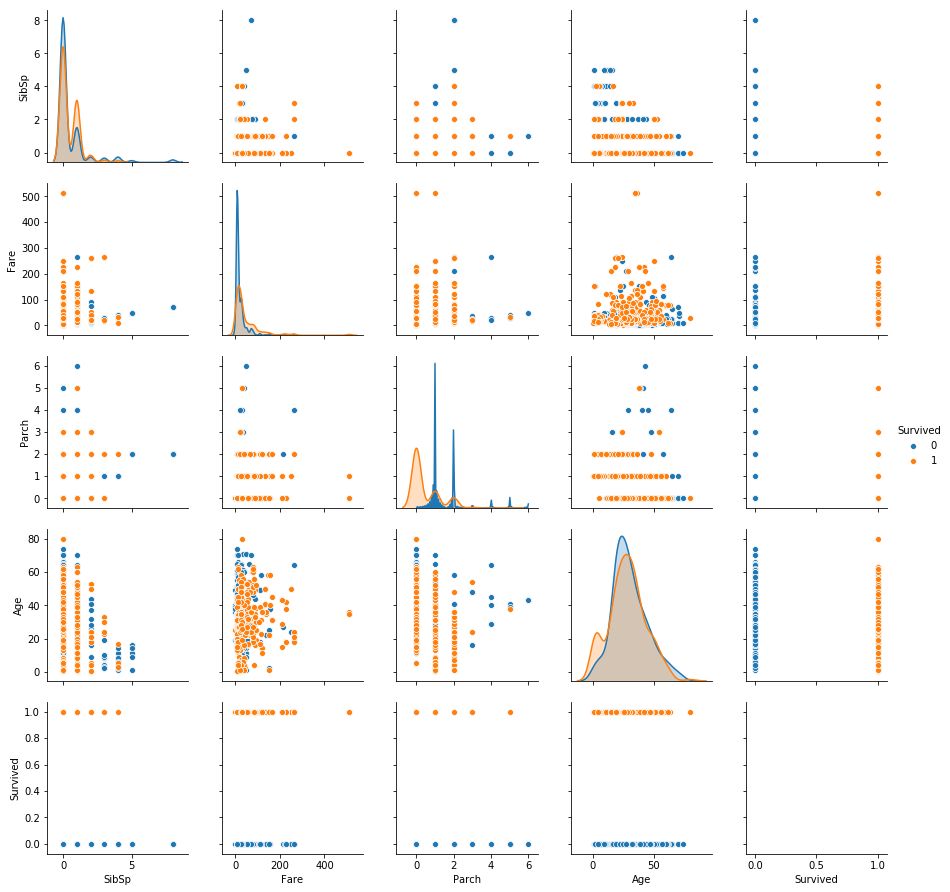

In [24]:
sns.pairplot(df[features+['Survived']],hue='Survived');

### Рис.3 - Распределение количественных признаков с помощью pairplot

(<Figure size 1152x432 with 2 Axes>, array([<matplotlib.axes._subplots.AxesSubplot object at 0x09819B70>,
      dtype=object))


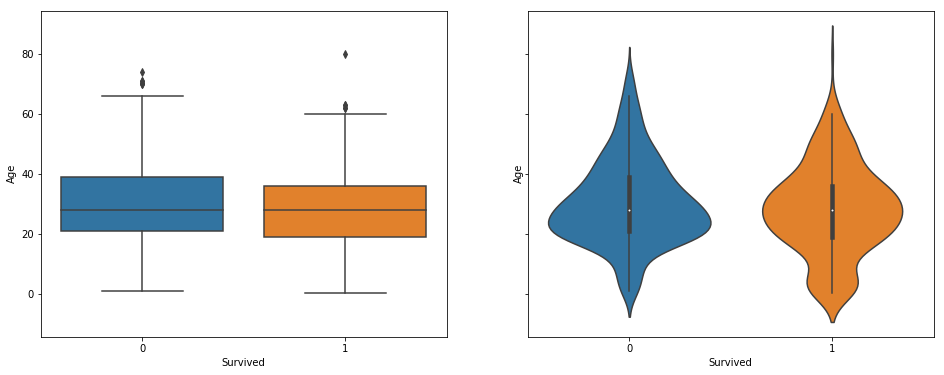

In [35]:
# _, axes=plt.subplots(1,2, sharey=True,figsize=(16,6))
arr = plt.subplots(1,2, sharey=True, figsize=(16,6))
print(arr)
axes = arr[1]
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0]);
sns.violinplot(x='Survived', y='Age', data=df, ax=axes[1]);

### Рис.4 - Распределение возраста выживших с помощью boxplot
На рисунке видно, что:
1. Медиана распределения приходится на возраст ближе к 30 годам и у погибших, и у выживших.
2. Размах распределения показывает, что средний возраст выживших и погибших от 20 до 40 лет.

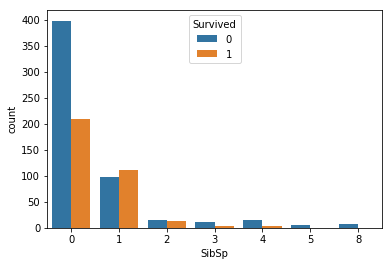

In [26]:
sns.countplot(x='SibSp', hue='Survived', data=df);


### Рис. 5 - Отношение числа выживших и пассажиров, имеющих братьев/сестер
На рисунке видно,что:
1. Основное количество пассажиров не имели братьев/сестер.
2. Около 400 пассажиров без братьев/сестер погибли, только половина выжили.
3. В случае, когда у пассажира 1 или 2 брата/сестры шансы выжить или погибнуть практически на равных.
4. Когда у пассажира от 3х братьев/сестер то шансы выжить падают.

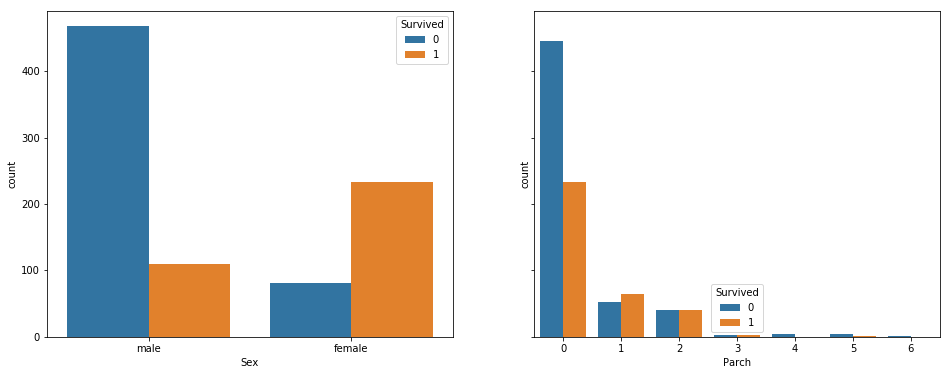

In [27]:
_, axes=plt.subplots(1, 2, sharey=True,figsize=(16,6))
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0]); 
sns.countplot(x='Parch', hue='Survived', data=df,ax=axes[1]);

### Рис 6.  - Распределение числа выживших по полу и количеству детей

На рисунке представлены 2 распределения: слева по полу(мужской,женский), справа по количеству детей у пассажиров

Мы видим, что:
1. Шанс выжить у мужчин в 5 раз ниже, чем у женщин
2. Большая часть мужчин и женщин ехали без детей. Шанс погибнуь у таких в два раза больше, чем выжить.
3. Шансы выжить у пар с 1 или 2 детьми 50/50.
4. С увеличением количества детей шансы выжить уменьшаются.


In [28]:
df.groupby(['Pclass'])['Age'].agg([np.max]).sort_values(by='amax', ascending=False).T

Pclass,1,3,2
amax,80.0,74.0,70.0
